In [1]:
import pandas as pd
import os
import opendatasets as od

In [2]:
dataset = 'https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/data'
# Using opendatasets let's download the data sets
od.download(dataset)

100%|██████████| 656M/656M [01:06<00:00, 10.3MB/s] 


In [3]:
from glob import glob

In [8]:
for i in glob("animal-image-dataset-90-different-animals/animals/animals/*"):
    print(i.split("/")[-1], len(glob(f"{i}/*")))

lizard 60
snake 60
chimpanzee 60
gorilla 60
cockroach 60
cow 60
swan 60
rat 60
wombat 60
horse 60
porcupine 60
sparrow 60
fly 60
woodpecker 60
cat 60
fox 60
butterfly 60
zebra 60
jellyfish 60
lobster 60
hedgehog 60
shark 60
kangaroo 60
ox 60
dragonfly 60
goose 60
caterpillar 60
owl 60
sheep 60
pigeon 60
goat 60
otter 60
whale 60
bison 60
pelecaniformes 60
raccoon 60
bee 60
duck 60
starfish 60
moth 60
seahorse 60
octopus 60
okapi 60
hare 60
turtle 60
squid 60
hamster 60
tiger 60
hippopotamus 60
seal 60
dolphin 60
crow 60
goldfish 60
bear 60
hummingbird 60
rhinoceros 60
hornbill 60
parrot 60
reindeer 60
eagle 60
leopard 60
squirrel 60
possum 60
oyster 60
penguin 60
bat 60
elephant 60
lion 60
dog 60
hyena 60
boar 60
coyote 60
flamingo 60
ladybugs 60
grasshopper 60
beetle 60
antelope 60
sandpiper 60
turkey 60
donkey 60
wolf 60
pig 60
badger 60
mosquito 60
deer 60
mouse 60
orangutan 60
panda 60
koala 60
crab 60


In [9]:
def get_images_labels(path):
    labels = {}
    for folder in glob(f"{path}/*"):
        label = folder.split("/")[-1]
        img_paths = glob(f"{folder}/*")
        labels[label] = img_paths
    return labels

In [13]:
labels = get_images_labels("/home/akeresh/Desktop/py4bd_project/data/animals/animals")

In [21]:
len(labels), labels.keys()

(90,
 dict_keys(['lizard', 'snake', 'chimpanzee', 'gorilla', 'cockroach', 'cow', 'swan', 'rat', 'wombat', 'horse', 'porcupine', 'sparrow', 'fly', 'woodpecker', 'cat', 'fox', 'butterfly', 'zebra', 'jellyfish', 'lobster', 'hedgehog', 'shark', 'kangaroo', 'ox', 'dragonfly', 'goose', 'caterpillar', 'owl', 'sheep', 'pigeon', 'goat', 'otter', 'whale', 'bison', 'pelecaniformes', 'raccoon', 'bee', 'duck', 'starfish', 'moth', 'seahorse', 'octopus', 'okapi', 'hare', 'turtle', 'squid', 'hamster', 'tiger', 'hippopotamus', 'seal', 'dolphin', 'crow', 'goldfish', 'bear', 'hummingbird', 'rhinoceros', 'hornbill', 'parrot', 'reindeer', 'eagle', 'leopard', 'squirrel', 'possum', 'oyster', 'penguin', 'bat', 'elephant', 'lion', 'dog', 'hyena', 'boar', 'coyote', 'flamingo', 'ladybugs', 'grasshopper', 'beetle', 'antelope', 'sandpiper', 'turkey', 'donkey', 'wolf', 'pig', 'badger', 'mosquito', 'deer', 'mouse', 'orangutan', 'panda', 'koala', 'crab']))

In [23]:
for label, paths in labels.items():
    print(label, paths)
    for path in paths:
        print(path)
        break
    break

lizard ['/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/4ffb2c3d41.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/5f41057c56.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/01d7ea45ff.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/24d121aeb9.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/996bf563b1.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/2e051fe5a6.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/1f3da493ac.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/3c7af6bff5.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/5f8337cd1d.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/07b66570fa.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/34d54d8b70.jpg', '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/4b0bc33314.jpg', '/home/a

In [24]:
string = '/home/akeresh/Desktop/py4bd_project/data/animals/animals/lizard/4ffb2c3d41.jpg'
idx = string.rfind("/")
string[idx+1:]

'4ffb2c3d41.jpg'

In [25]:
os.path.basename(string)

'4ffb2c3d41.jpg'

In [45]:
import weaviate
import os
from dotenv import load_dotenv

load_dotenv()

WEAVIATE_URL = os.environ.get("WEAVIATE_URL")
WEAVIATE_API_KEY = os.environ.get("WEAVIATE_API_KEY")

client = weaviate.Client(
    url = WEAVIATE_URL,
    auth_client_secret=weaviate.AuthApiKey(api_key=WEAVIATE_API_KEY),
)

if client.schema.exists("Animals"):
    client.schema.delete_class("Animals")
    print("deleted")

In [46]:
class_obj = {
    "class": "Animals",
    "vectorizer": "none",
}

client.schema.create_class(class_obj)

In [47]:
client.schema.get()

{'classes': [{'class': 'Question',
   'invertedIndexConfig': {'bm25': {'b': 0.75, 'k1': 1.2},
    'cleanupIntervalSeconds': 60,
    'stopwords': {'additions': None, 'preset': 'en', 'removals': None}},
   'multiTenancyConfig': {'enabled': False},
   'properties': [{'dataType': ['text'],
     'description': "This property was generated by Weaviate's auto-schema feature on Wed Jan 10 09:33:17 2024",
     'indexFilterable': True,
     'indexSearchable': True,
     'name': 'answer',
     'tokenization': 'word'},
    {'dataType': ['text'],
     'description': "This property was generated by Weaviate's auto-schema feature on Wed Jan 10 09:33:17 2024",
     'indexFilterable': True,
     'indexSearchable': True,
     'name': 'question',
     'tokenization': 'word'},
    {'dataType': ['text'],
     'description': "This property was generated by Weaviate's auto-schema feature on Wed Jan 10 09:33:17 2024",
     'indexFilterable': True,
     'indexSearchable': True,
     'name': 'category',
     't

weaviate.client.Client

In [37]:
import requests
import json
import weaviate
import os
from dotenv import load_dotenv

load_dotenv()

WEAVIATE_URL = os.environ.get("WEAVIATE_URL")
WEAVIATE_API_KEY = os.environ.get("WEAVIATE_API_KEY")

client = weaviate.Client(
    url = WEAVIATE_URL,
    auth_client_secret=weaviate.AuthApiKey(api_key=WEAVIATE_API_KEY),
)

if client.schema.exists("Question"):
    client.schema.delete_class("Question")


# Class definition object. Weaviate's autoschema feature will infer properties when importing.
class_obj = {
    "class": "Question",
    "vectorizer": "none",
}

# Add the class to the schema
client.schema.create_class(class_obj)

url = 'https://raw.githubusercontent.com/weaviate-tutorials/quickstart/main/data/jeopardy_tiny+vectors.json'
resp = requests.get(url)
data = json.loads(resp.text)

# Configure a batch process
client.batch.configure(batch_size=1)  # Configure batch
with client.batch as batch:
    # Batch import all Questions
    for i, d in enumerate(data):
        print(f"importing question: {i+1}")

        properties = {
            "answer": d["Answer"],
            "question": d["Question"],
            "category": d["Category"],
        }

        batch.add_data_object(properties, "Question", vector=d["Vector"])

importing question: 1
importing question: 2
importing question: 3
importing question: 4
importing question: 5
importing question: 6
importing question: 7
importing question: 8
importing question: 9
importing question: 10


In [36]:
client.

{
    "data": {
        "Get": {
            "Question": [
                {
                    "_additional": {
                        "certainty": 0.8994866013526917
                    },
                    "answer": "DNA",
                    "category": "SCIENCE",
                    "question": "In 1953 Watson & Crick built a model of the molecular structure of this, the gene-carrying substance"
                },
                {
                    "_additional": {
                        "certainty": 0.8925415277481079
                    },
                    "answer": "species",
                    "category": "SCIENCE",
                    "question": "2000 news: the Gunnison sage grouse isn't just another northern sage grouse, but a new one of this classification"
                }
            ]
        }
    }
}


### Get data from DB

In [50]:
# STEP 1 - Prepare a helper function to iterate through data in batches
def get_batch_with_cursor(collection_name, batch_size, cursor=None):
    # First prepare the query to run through data
    query = (
        client.query.get(
            collection_name,         # update with your collection name
            # ["question", "answer", "category"] # update with the required properties
            ["label", "img_name"]
        )
        .with_additional(["id"])
        .with_limit(batch_size)
    )

    # Fetch the next set of results
    if cursor is not None:
        result = query.with_after(cursor).do()
    # Fetch the first set of results
    else:
        result = query.do()

    print(result)

    return result["data"]["Get"][collection_name]

# STEP 2 - Iterate through the data
cursor = None
collection_name = "Animals"
while True:
    # Get the next batch of objects
    next_batch = get_batch_with_cursor(collection_name, 1, cursor)

    # Break the loop if empty – we are done
    if len(next_batch) == 0:
        break

    # Here is your next batch of objects
    print(next_batch)

    # Move the cursor to the last returned uuid
    cursor=next_batch[-1]["_additional"]["id"]

{'data': {'Get': {'Animals': [{'_additional': {'id': '0476aa17-0c4c-408c-a850-84b898941b46'}, 'img_name': '3a00537173.jpg', 'label': 'snake'}]}}}
[{'_additional': {'id': '0476aa17-0c4c-408c-a850-84b898941b46'}, 'img_name': '3a00537173.jpg', 'label': 'snake'}]
{'data': {'Get': {'Animals': [{'_additional': {'id': '054c3762-99c1-4990-b76b-5e81f5476b4d'}, 'img_name': '6c571eb6cc.jpg', 'label': 'gorilla'}]}}}
[{'_additional': {'id': '054c3762-99c1-4990-b76b-5e81f5476b4d'}, 'img_name': '6c571eb6cc.jpg', 'label': 'gorilla'}]
{'data': {'Get': {'Animals': [{'_additional': {'id': '12c71fc4-519d-4d9a-9940-8e2ebdcedeaf'}, 'img_name': '36ba2541c2.jpg', 'label': 'gorilla'}]}}}
[{'_additional': {'id': '12c71fc4-519d-4d9a-9940-8e2ebdcedeaf'}, 'img_name': '36ba2541c2.jpg', 'label': 'gorilla'}]
{'data': {'Get': {'Animals': [{'_additional': {'id': '14eea9ad-598d-463a-8c93-e5a7a1904234'}, 'img_name': '5f41057c56.jpg', 'label': 'lizard'}]}}}
[{'_additional': {'id': '14eea9ad-598d-463a-8c93-e5a7a1904234'}, 

## Search date in DB

In [55]:
import open_clip
import torch
from PIL import Image
import matplotlib.pyplot as plt

model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms(
        "hf-hub:imageomics/bioclip"
    )

tokenizer = open_clip.get_tokenizer("hf-hub:imageomics/bioclip")

In [53]:
@torch.no_grad()
def create_embeddings(img_path, model, preprocess, device_type="cpu"):
    image = Image.open(img_path)
    preprocessed_image = preprocess(image).unsqueeze(0)

    with torch.autocast(device_type):
        image_features = model.encode_image(preprocessed_image)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)

    return image_features

In [58]:
embedding = create_embeddings("gorilla.jpg", model, preprocess_val)
embedding.shape

torch.Size([1, 512])

In [61]:
nearVector = {"vector": embedding}

In [64]:
result = client.query.get(
        "Animals", ["label", "img_name"]
    ).with_near_vector(
        nearVector
    ).with_limit(5).with_additional(['certainty']).do()

In [65]:
result

{'data': {'Get': {'Animals': [{'_additional': {'certainty': 0.9278748631477356},
     'img_name': '92bd5a31ed.jpg',
     'label': 'gorilla'},
    {'_additional': {'certainty': 0.9051879346370697},
     'img_name': '0f31875d98.jpg',
     'label': 'gorilla'},
    {'_additional': {'certainty': 0.890535980463028},
     'img_name': '8b41523b24.jpg',
     'label': 'gorilla'},
    {'_additional': {'certainty': 0.8884844481945038},
     'img_name': '054bb376ed.jpg',
     'label': 'chimpanzee'},
    {'_additional': {'certainty': 0.888283908367157},
     'img_name': '8fd20d83cc.jpg',
     'label': 'chimpanzee'}]}}}

## Check convertion

In [7]:
import base64
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
def convert_image_to_b64(image_path):
    with open(image_path, 'rb') as image_file:
        base64_encoded_data = base64.b64encode(image_file.read())
    base64_string = base64_encoded_data.decode("utf-8")
    return base64_string

def convert_b64_to_image(image_b64_string: str) -> np.ndarray:
    img_b64_enc = bytes(image_b64_string, "utf-8")
    img_b64_dec = base64.b64decode(img_b64_enc)
    img_arr = np.frombuffer(img_b64_dec, dtype=np.uint8)
    img = cv2.imdecode(img_arr, flags=cv2.IMREAD_COLOR)
    return img


In [68]:
img = Image.open("images/gorilla.jpg")

In [72]:
convert_image_to_b64("images/gorilla.jpg")

'/9j/4AAQSkZJRgABAQEBLAEsAAD/7ST2UGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAASYcAQAAAgAEHAFaAAMbJUccAgAAAgAEHAJ4AERNb3VudGFpbiBHb3JpbGxhIChHb3JpbGxhIGJlcmluZ2VpKSBzaWx2ZXJiYWNrIGluIFN1c2EgZ3JvdXAsIFJ3YW5kYRwCUAAgbmF0dXJlcGwuY29tICAvIEFuZHkgUm91c2UgLyBXV0YcAnMABTEwNzU5HAIFAEBNb3VudGFpbiBHb3JpbGxhIChHb3JpbGxhIGJlcmluZ2VpKSBzaWx2ZXJiYWNrIGluIFN1c2EgZ3JvdXAsIFJ3HAI3AAgyMDEwMDMzMBwCPAAGMDAwMDAwHAJnAAYyODczNzUcAnQAIG5hdHVyZXBsLmNvbSAgLyBBbmR5IFJvdXNlIC8gV1dGHAIWAAYyODczNzU4QklNBCUAAAAAABDimGQ3SWSTxVn6eqf7UE+vOEJJTQQ6AAAAAADlAAAAEAAAAAEAAAAAAAtwcmludE91dHB1dAAAAAUAAAAAUHN0U2Jvb2wBAAAAAEludGVlbnVtAAAAAEludGUAAAAAQ2xybQAAAA9wcmludFNpeHRlZW5CaXRib29sAAAAAAtwcmludGVyTmFtZVRFWFQAAAABAAAAAAAPcHJpbnRQcm9vZlNldHVwT2JqYwAAAAwAUAByAG8AbwBmACAAUwBlAHQAdQBwAAAAAAAKcHJvb2ZTZXR1cAAAAAEAAAAAQmx0bmVudW0AAAAMYnVpbHRpblByb29mAAAACXByb29mQ01ZSwA4QklNBDsAAAAAAi0AAAAQAAAAAQAAAAAAEnByaW50T3V0cHV0T3B0aW9ucwAAABcAAAAAQ3B0bmJvb2wAAAAAAENsYnJib29sAAAAAABSZ3NNYm9vbAAAAAAAQ3JuQ2Jvb2wAAAAAAENudENib29sAAAAAABMYmxzYm9vbAAAAAAATmd0dmJ

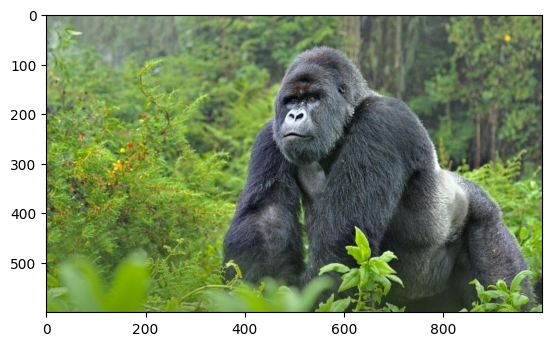

In [9]:
plt.imshow(convert_b64_to_image(convert_image_to_b64("images/gorilla.jpg"))[...,::-1])

In [1]:
import os
from glob import glob

def get_images_labels(path):
    labels = {}
    for folder in glob(os.path.join(path, "*")):
        label = os.path.basename(folder)
        img_paths = glob(os.path.join(folder, "*"))
        labels[label] = img_paths
    return labels


In [2]:
res = get_images_labels("/home/akeresh/Desktop/py4bd_project/data/animals/animals")

In [14]:
dict(list(res.items())[81:])

{'pig': ['/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/0ce8af160c.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/8c13b149db.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/9d515444d5.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/9f1cc34925.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/8cc0811cce.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/89de072250.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/0b0338d4c0.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/61cf5127ce.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/47ba24c2d3.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/3a73e8b3da.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/53b72af51e.jpg',
  '/home/akeresh/Desktop/py4bd_project/data/animals/animals/pig/0bfd91d96d.jpg',
  '/home/akeresh/Desk